In [9]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
csv = pd.read_csv('ObesityDataSet.csv')
print(type(csv))

<class 'pandas.core.frame.DataFrame'>


##### New Method or Techniques

In [12]:
csv.head(10)

#this showcases the top 10 values


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


# Dataset Description and Data Cleaning

<span style="font-family: Times New Roman">This dataset includes information for estimatingobesity levels in individuals from Mexico, Peru, and Colombia, based on their dietary habits and physical condition. It contains 17 attributes and 2111 records, each labeled with the NObesity (Obesity Level) class variable, which categorizes the data into Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III. 


In [13]:
rows_columns=csv.shape
print(rows_columns)
print('rows',rows_columns[0])
print('columns',rows_columns[1]) 

#Within this Data set there are 17 columns 
#Witing this Data set there are 2111 rows

(2111, 17)
rows 2111
columns 17


Gender: Feature, Categorical, "Gender"

Age : Feature, Continuous, "Age"

Height: Feature, Continuous

Weight: Feature Continuous

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

NCP : Feature, Continuous, " How many main meals do you have daily? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

FAF: Feature, Continuous, " How often do you have physical activity? "
TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "

MTRANS : Feature, Categorical, " Which transportation do you usually use? "

NObeyesdad : Target, Categorical, "Obesity level"

In [22]:
list_columns=list(csv.columns)
print(list_columns)

['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


In [21]:
csv['Gender'].unique() #THE GENDERS IN THE STUDY

array(['Female', 'Male'], dtype=object)

In [16]:
csv['CALC'].unique() #How often do you drink alcohol?

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [18]:
csv['MTRANS'].unique() #Which transportation do you usually use?

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [19]:
csv['NObeyesdad'].unique() #"Obesity levels"

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [23]:

print(csv.describe()) # this lists the count, mean, standard deviation, range, and quartiles of numeric columns.


               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [24]:
#To check whether each element in a DataFrame is missing
print(csv.isnull())

        Age  Gender  Height  Weight   CALC   FAVC   FCVC    NCP    SCC  SMOKE  \
0     False   False   False   False  False  False  False  False  False  False   
1     False   False   False   False  False  False  False  False  False  False   
2     False   False   False   False  False  False  False  False  False  False   
3     False   False   False   False  False  False  False  False  False  False   
4     False   False   False   False  False  False  False  False  False  False   
...     ...     ...     ...     ...    ...    ...    ...    ...    ...    ...   
2106  False   False   False   False  False  False  False  False  False  False   
2107  False   False   False   False  False  False  False  False  False  False   
2108  False   False   False   False  False  False  False  False  False  False   
2109  False   False   False   False  False  False  False  False  False  False   
2110  False   False   False   False  False  False  False  False  False  False   

       CH2O  family_history

In [25]:
print(csv.columns) #there a no missing values in the data

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


# Data Operation and Data Visualization

Organizing 

In [50]:
csv4=csv.iloc[0:4]
print(csv4)

csv5=csv.iloc[10:16]
print(csv5)

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   

           NObeyesdad  
0       Normal_Weight  
1       Normal_Weight  
2       Normal_Weight  
3  Overweight_Level_I  
     Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O 

In [51]:
# Get a subset with rows 1, 5, and 10.
csv7=csv.iloc[[1,5,10]]
print(csv7)

     Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
1   21.0  Female    1.52    56.0  Sometimes   no   3.0  3.0  yes   yes   3.0   
5   29.0    Male    1.62    53.0  Sometimes  yes   2.0  3.0   no    no   2.0   
10  26.0    Male    1.85   105.0  Sometimes  yes   3.0  3.0   no    no   3.0   

   family_history_with_overweight  FAF  TUE        CAEC  \
1                             yes  3.0  0.0   Sometimes   
5                              no  0.0  0.0   Sometimes   
10                            yes  2.0  2.0  Frequently   

                   MTRANS      NObeyesdad  
1   Public_Transportation   Normal_Weight  
5              Automobile   Normal_Weight  
10  Public_Transportation  Obesity_Type_I  


In [58]:
csv9=csv[(csv['Age'] < 20) & (csv['FAF'] == 0)].reset_index(drop=True)#Reset the index
print(csv8)

           Age  Gender    Height      Weight       CALC FAVC  FCVC  NCP  SCC  \
0    19.000000    Male  1.750000   76.000000  Sometimes  yes   3.0  3.0  yes   
1    17.000000  Female  1.650000   67.000000         no  yes   3.0  1.0   no   
2    19.000000    Male  1.850000   65.000000  Sometimes   no   2.0  3.0   no   
3    19.000000  Female  1.630000   58.000000         no   no   3.0  3.0  yes   
4    19.000000  Female  1.600000   45.000000         no   no   3.0  3.0  yes   
..         ...     ...       ...         ...        ...  ...   ...  ...  ...   
532  18.423482  Female  1.735461  126.798173  Sometimes  yes   3.0  3.0   no   
533  19.528936  Female  1.817917  142.559161  Sometimes  yes   3.0  3.0   no   
534  19.364339  Female  1.808350  150.516480  Sometimes  yes   3.0  3.0   no   
535  19.012872  Female  1.742062  133.779919  Sometimes  yes   3.0  3.0   no   
536  18.469086  Female  1.741925  133.017105  Sometimes  yes   3.0  3.0   no   

    SMOKE      CH2O family_history_with

# Visualization Analysis and Reporting 


### Data Summary

<span style="font-family: Times New Roman">This dataset contains information for evaluating obesity levels in individuals, including various lifestyle and dietary habits. It includes 17 attributes such as gender, age, height, weight, family history of overweight, and several behavioral factors like frequency of high-caloric food consumption, vegetable intake, smoking habits, and physical activity levels. The data also covers daily water intake, calorie monitoring, and technology use. Transportation habits and alcohol consumption frequency are also recorded. The target variable is the obesity level, categorized into different classes.



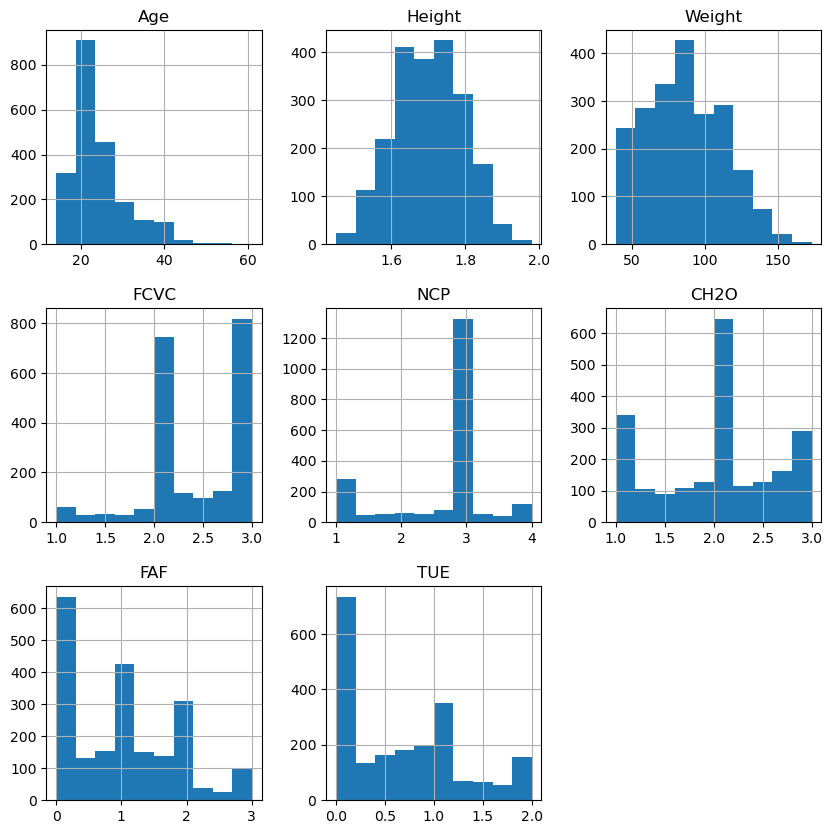

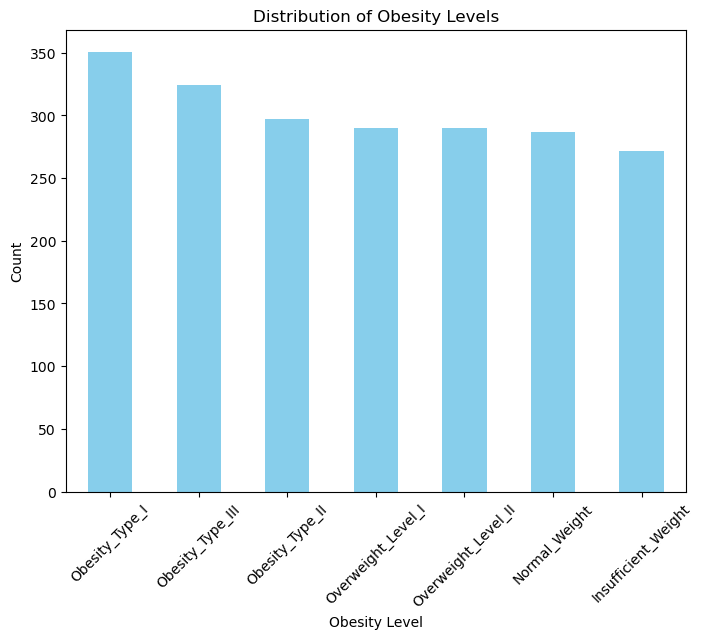

In [64]:
csv.hist(figsize=(10, 10))
plt.show()
plt.figure(figsize=(8, 6))
csv['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#New graphing 



### Data Visuals Outcome Summary

<span style="font-family: Times New Roman">The visualizations of the dataset reveal significant patterns in lifestyle factors and their association with obesity levels. The histograms for variables such as Age, Height, Weight, and behavioral factors like FCVC (vegetable consumption), NCP (number of main meals), CH2O (water intake), FAF (physical activity frequency), and TUE (technology use) show distinct distributions. 
Most notably, the high prevalence of Obesity Type I, II, and III in the distribution of obesity levels suggests a substantial segment of the population is experiencing severe obesity. Patterns indicate that higher vegetable consumption (FCVC) and frequent physical activity (FAF) might correlate with lower obesity levels, while more frequent main meals (NCP) and higher water consumption (CH2O) may also play a role in managing weight. These insights support hypotheses that improving dietary habits, increasing physical activity, and maintaining proper hydration are key strategies in reducing obesity levels. Conversely, increased technology use (TUE) might be associated with higher obesity levels, highlighting the importance of balanced lifestyles. Further detailed analysis and modeling would be necessary to confirm these hypotheses and understand the causal relationships between these factors and obesity.

# Additional New Method

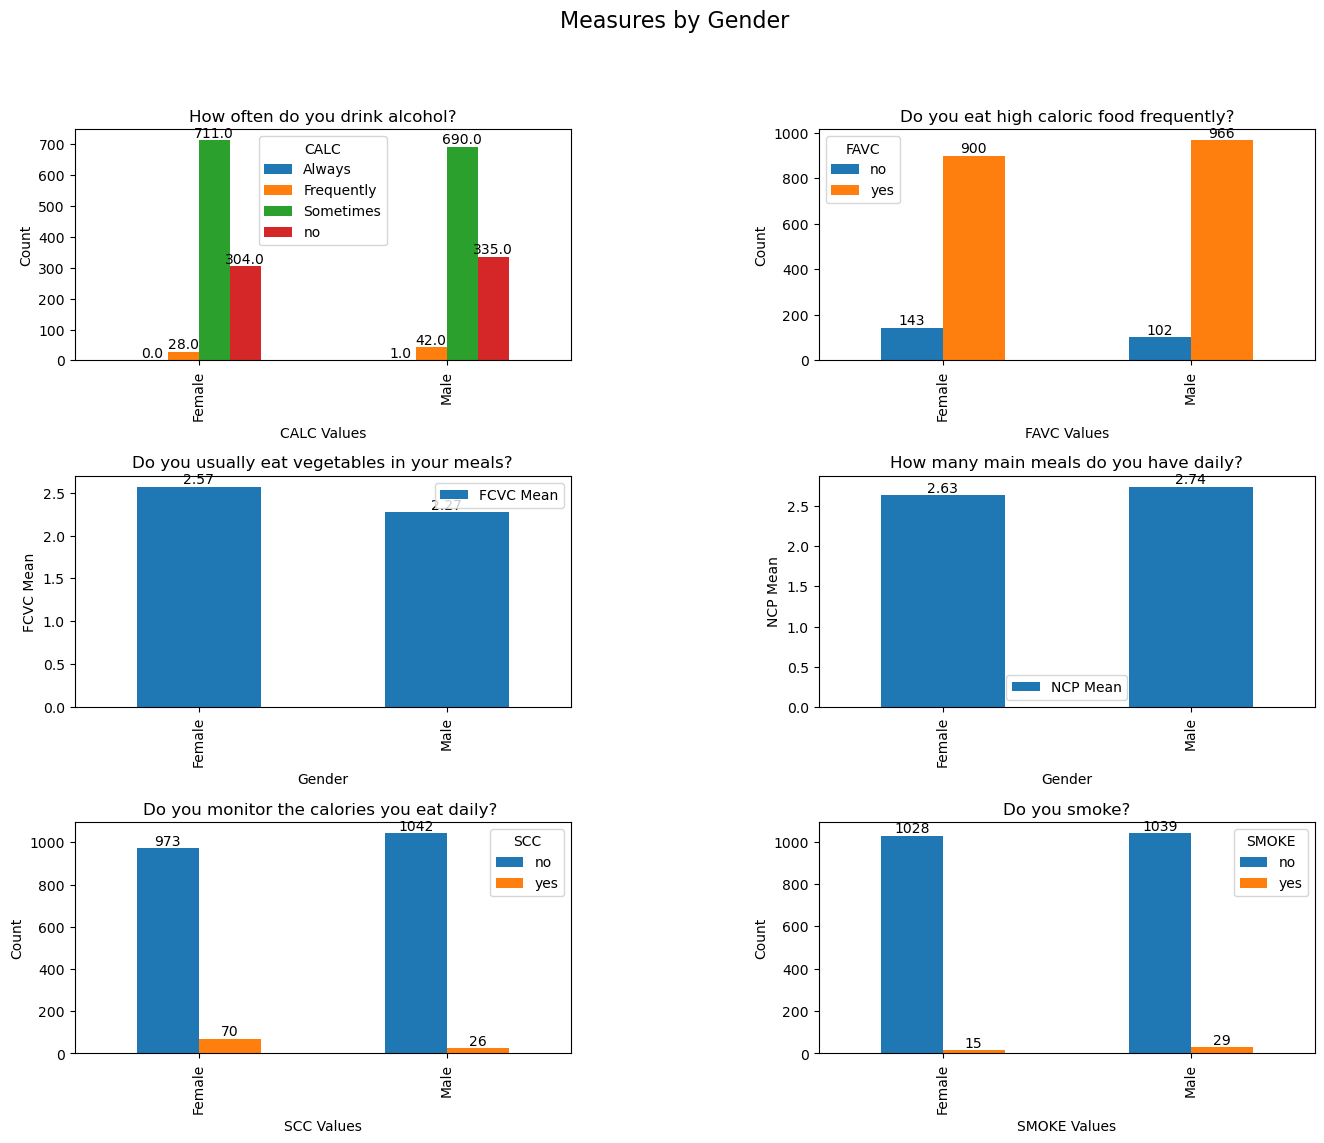

In [65]:
# Group the data by gender
grouped = csv.groupby('Gender')

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.suptitle('Measures by Gender', fontsize=16)

# Visualize CALC
calc_counts = grouped['CALC'].value_counts().unstack()
calc_counts.plot(kind='bar', ax=axes[0, 0])

# Set title, labels, and annotations
axes[0, 0].set_title('How often do you drink alcohol?')
axes[0, 0].set_xlabel('CALC Values')
axes[0, 0].set_ylabel('Count')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                        ha='center', va='bottom')

# Visualize FAVC
favc_counts = grouped['FAVC'].value_counts().unstack()
favc_counts.plot(kind='bar', ax=axes[0, 1])

# Set title, labels, and annotations
axes[0, 1].set_title('Do you eat high caloric food frequently?')
axes[0, 1].set_xlabel('FAVC Values')
axes[0, 1].set_ylabel('Count')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5),
                        ha='center', va='bottom')

# Visualize FCVC
fcvc_means = grouped['FCVC'].mean().reset_index()
fcvc_means.columns = ['Gender', 'FCVC Mean']
fcvc_means.set_index('Gender', inplace=True)
fcvc_means.plot(kind='bar', ax=axes[1, 0])

# Set title, labels, and annotations
axes[1, 0].set_title('Do you usually eat vegetables in your meals?')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('FCVC Mean')
for p in axes[1, 0].patches:
    bar_width = p.get_width()
    bar_height = p.get_height()
    bar_x = p.get_x()
    bar_middle = bar_x + bar_width / 2
    axes[1, 0].annotate(str(round(bar_height, 2)), (bar_middle, bar_height), ha='center', va='bottom')

# Visualize NCP
ncp_means = grouped['NCP'].mean().reset_index()
ncp_means.columns = ['Gender', 'NCP Mean']
ncp_means.set_index('Gender', inplace=True)
ncp_means.plot(kind='bar', ax=axes[1, 1])

# Set title, labels, and annotations
axes[1, 1].set_title('How many main meals do you have daily?')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('NCP Mean')
for p in axes[1, 1].patches:
    bar_width = p.get_width()
    bar_height = p.get_height()
    bar_x = p.get_x()
    bar_middle = bar_x + bar_width / 2
    axes[1, 1].annotate(str(round(bar_height, 2)), (bar_middle, bar_height), ha='center', va='bottom')

# Visualize SCC
scc_counts = grouped['SCC'].value_counts().unstack()
scc_counts.plot(kind='bar', ax=axes[2, 0])

# Set title, labels, and annotations
axes[2, 0].set_title('Do you monitor the calories you eat daily? ')
axes[2, 0].set_xlabel('SCC Values')
axes[2, 0].set_ylabel('Count')
for p in axes[2, 0].patches:
    axes[2, 0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Visualize SMOKE
smoke_counts = grouped['SMOKE'].value_counts().unstack()
smoke_counts.plot(kind='bar', ax=axes[2, 1])

# Set title, labels, and annotations
axes[2, 1].set_title('Do you smoke?')
axes[2, 1].set_xlabel('SMOKE Values')
axes[2, 1].set_ylabel('Count')
for p in axes[2, 1].patches:
    axes[2, 1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the plot
plt.show()

### Data Visuals Outcome Summary 2 

<span style="font-family: Times New Roman">The image presents various health-related behaviors segmented by gender. Both genders show similar patterns in alcohol consumption, with the majority not drinking frequently. High caloric food consumption is more prevalent among males (966) compared to females (900). Both genders have a high average intake of vegetables, with females at 2.57 and males slightly lower at 2.47. Males tend to have more main meals daily (2.74) than females (2.63). Calorie monitoring is relatively low, with slightly more females (70) than males (26) tracking their intake. Smoking rates are also low and similar across genders, with 29 males and 15 females reporting smoking. These patterns suggest that while there are slight differences in specific behaviors, overall health behaviors are relatively consistent between genders. Overall, the data suggests that while there are positive trends in some health behaviors, there are clear opportunities for targeted interventions to address gender-specific gaps in dietary habits and health monitoring practices.


# Project Summary

### Key Discoveries

<span style="font-family: Times New Roman">**Dietary Habits and Obesity Levels**: There is a notable pattern linking high caloric food consumption (FAVC) and low vegetable intake (FCVC) with higher levels of obesity. Individuals who frequently eat high-calorie foods and seldom include vegetables in their meals are more likely to fall into the higher obesity categories.

<span style="font-family: Times New Roman">**Physical Activity and Technology Use**: Another significant pattern is the relationship between physical activity (FAF), time spent on technological devices (TUE), and obesity levels. Those who engage in less physical activity and spend more time on devices tend to have higher obesity levels.

<span style="font-family: Times New Roman">### Solutions

<span style="font-family: Times New Roman">**Promoting Healthy Eating**: Encourage a balanced diet rich in vegetables and low in high-calorie foods. Public health campaigns and educational programs can help people make healthier food choices, potentially reducing obesity rates.

<span style="font-family: Times New Roman">**Increasing Physical Activity**: Promote regular physical activity through community programs, school initiatives, and workplace wellness plans. Providing accessible and enjoyable exercise options can help people incorporate more activity into their daily routines.

<span style="font-family: Times New Roman">**Limiting Screen Time**: Educate individuals, especially children and teenagers, on the importance of limiting screen time and incorporating more physical activities into their leisure time. Schools and parents can play a critical role in this effort.

<span style="font-family: Times New Roman">### Takeaways

<span style="font-family: Times New Roman">**Diet and exercise are crucial** in managing and preventing obesity. Individuals who maintain a balanced diet and engage in regular physical activity are less likely to fall into higher obesity categories.
**Behavioral changes** such as monitoring calorie intake, reducing screen time, and making conscious food choices can significantly impact obesity levels.
**Public health strategies** should focus on these key areas to effectively combat the obesity epidemic. By understanding and addressing the factors highlighted in this dataset, better health outcomes can be achieved for the population.</span>
